## Numeric Data 
Arithmetic transformations are relatively sensitive to outliers (too large or too small). In particular, if we want to build a feature based on the average of a column, outliers can change the mean significantly.

Outlier values ​​also significantly affect the quality of machine learning models. Consider the simple example below.

In [14]:
import pandas as pd
df_example = pd.DataFrame(
    data={
        "height": [147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183],
        "weight": [49, 50, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68],
        "height_2": [110, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183],
        "weight_2": [49, 90, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68],
    }
)
df_example

,height,weight,height_2,weight_2
0,147,49,110,49
1,150,50,150,90
2,153,51,153,51
3,158,54,158,54
4,163,58,163,58
5,165,59,165,59
6,168,60,168,60
7,170,62,170,62
8,173,63,173,63
9,175,64,175,64


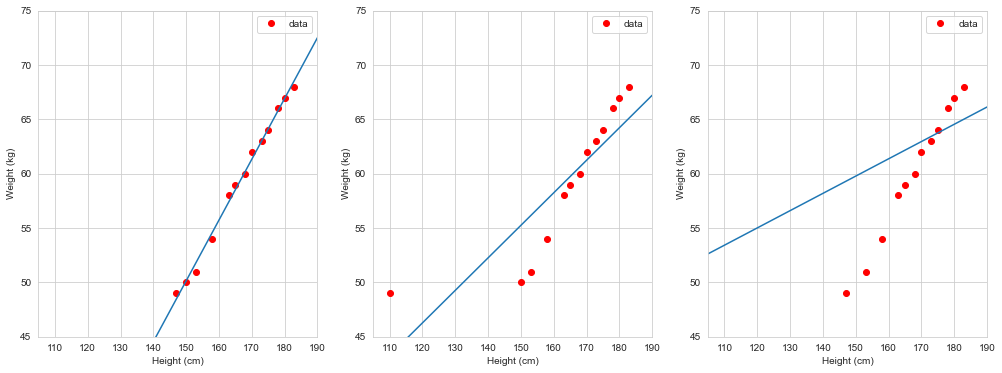

In [15]:
# Modelling by Linear Regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Function apply model LR 
def fit_linear_regression_and_visualize(df, input_col, label_col):
    # Fit the model by Linear Regression
    lr = LinearRegression()
    lr.fit(df[[input_col]], df[label_col])

    # The “slope” parameters (w), also called weights or coefficients, are stored in the coef_ attribute
    # while the offset or intercept (b) is stored in the intercept_ attribute
    weight, bias = lr.coef_, lr.intercept_

    # Visualize
    plt.plot(df[input_col], df[label_col], "ro", label="data")                      # Plot scatter df (ro=red_O)
    plt.plot([105, 190], [weight * 105 + bias, weight * 190 + bias])                # Plot line LR

    # Lim x, y and label
    plt.axis([105, 190, 45, 75])
    plt.xlabel("Height (cm)")
    plt.ylabel("Weight (kg)")
    plt.legend()

# Plot for each case
plt.figure(figsize=(17, 6))
plt.subplot(1, 3, 1)
fit_linear_regression_and_visualize(df_example, input_col="height", label_col="weight")

plt.subplot(1, 3, 2)
fit_linear_regression_and_visualize(df_example, input_col="height_2", label_col="weight")

plt.subplot(1, 3, 3)
fit_linear_regression_and_visualize(df_example, input_col="height", label_col="weight_2")

# Process Outliers
### Box plot


In [16]:
# California Dataset
df_housing = pd.read_csv("/Users/charles/MLE/Pre_Data/EDA/Data/Cali_Housing.csv")
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


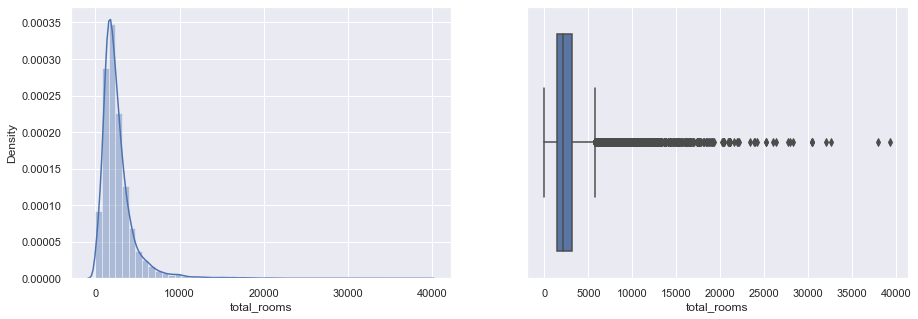

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Total Room Visualize 
import seaborn as sns
sns.set_theme()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(df_housing["total_rooms"],  ax=axs[0]);
sns.boxplot(df_housing["total_rooms"],  ax=axs[1]);

From the histogram, we see that the data is skewed to the right (some outliers are heavily skewed to the right, or the "tail" of the histogram is to the right). From the boxplot, we see that quite a few points are considered outliers.
Outliers can be handled by clipping the minimum and maximum values of the Box plot.

Estimator
---------

The central piece of transformer, regressor, and classifier is
`sklearn.base.BaseEstimator`. All estimators in scikit-learn are derived
from this class. In more details, this base class enables to set and get
parameters of the estimator. It can be imported as::

    >>> from sklearn.base import BaseEstimator

Once imported, you can create a class which inherate from this base class::

    >>> class MyOwnEstimator(BaseEstimator):
    ...     pass

Transformer
-----------

Transformers are scikit-learn estimators which implement a ``transform`` method.
The use case is the following:

* at ``fit``, some parameters can be learned from ``X`` and ``y``;
* at ``transform``, `X` will be transformed, using the parameters learned
  during ``fit``.

In addition, scikit-learn provides a
`mixin`, i.e. `sklearn.base.TransformerMixin`, which
implement the combination of ``fit`` and ``transform`` called ``fit_transform``::

One can import the mixin class as::

    >>> from sklearn.base import TransformerMixin

Therefore, when creating a transformer, you need to create a class which
inherits from both `sklearn.base.BaseEstimator` and
`sklearn.base.TransformerMixin`. The scikit-learn API imposed ``fit`` to
**return ``self``**. The reason is that it allows to pipeline ``fit`` and
``transform`` imposed by the `sklearn.base.TransformerMixin`. The
``fit`` method is expected to have ``X`` and ``y`` as inputs. Note that
``transform`` takes only ``X`` as input and is expected to return the
transformed version of ``X``::

    >>> class MyOwnTransformer(BaseEstimator, TransformerMixin):
    ...     def fit(self, X, y=None):
    ...         return self
    ...     def transform(self, X):
    ...         return X

In [18]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin

def find_boxplot_boundaries(df_col):
    Q1 = df_col.quantile(0.25)
    Q3 = df_col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR   # ≥ 0 for this feature
    upper = Q3 + 1.5 * IQR
    return lower, upper

# OOP Inheritance
class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.lower = None
        self.upper = None

    def fit(self, df_col):
        self.lower, self.upper = find_boxplot_boundaries(df_col)
        return self

    def transform(self, df_col):
        return df_col.clip(self.lower, self.upper)

In [19]:
find_boxplot_boundaries(df_housing["total_rooms"])

(-1102.625, 5698.375)

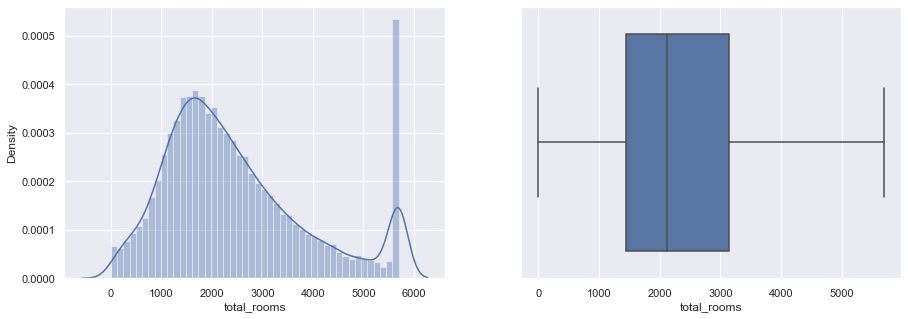

In [20]:
#clipped_total_rooms = BoxplotOutlierClipper().fit(df_housing["total_rooms"]).transform(df_housing["total_rooms"])
clipped_total_rooms = BoxplotOutlierClipper().fit_transform(df_housing["total_rooms"])

# Plot new data (clipped)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(clipped_total_rooms, ax = axs[0])
sns.boxplot(clipped_total_rooms, ax = axs[1]);

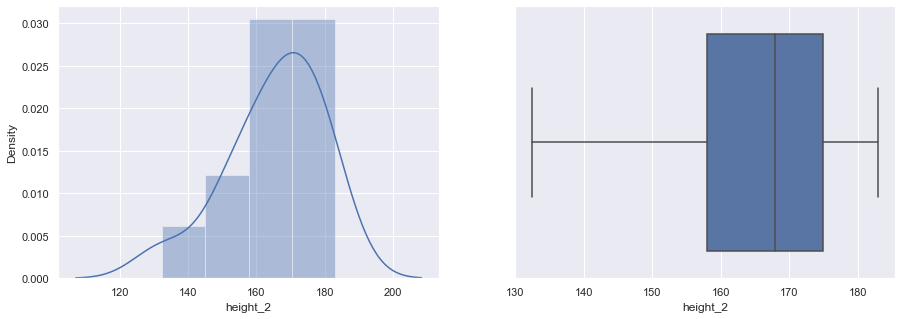

In [21]:
# For first example
clipped_height_2 = BoxplotOutlierClipper().fit_transform(df_example["height_2"])

# Plot new data (clipped)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(clipped_height_2, ax = axs[0])
sns.boxplot(clipped_height_2, ax = axs[1]);

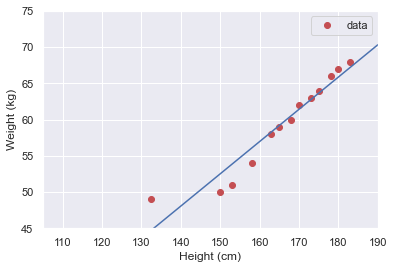

In [22]:
# Applied transform 
df_example["clipped_height_2"] = BoxplotOutlierClipper().fit_transform(df_example["height_2"])
# Fit LR 
fit_linear_regression_and_visualize(df_example, input_col="clipped_height_2", label_col="weight")

## Category Data
Unlike the case of numeric data, outliers in item information fields are more difficult to detect. Partly because of the difficulty of plotting histograms, especially when there are many different item values, partly because outliers of this type require specialized knowledge of valid values.

With item data, an outlier can occur in one of the following cases:

* Due to the difference in data input. For example, one part of the data is obtained in uppercase, and another part is in lowercase, such as "VIETNAM" and "Vietnam." Another example would be for a category to have different names, such as "City" and "Tp." In this case, we need to normalize the values ​​to the same form to eliminate outliers.

* Due to typos, some samples have different values ​​from others. To deal with misspelling data, we can plot a histogram that shows the frequency of each sign in the actual data. Usually, typos are in low-frequency categories. These errors need to be fixed before going to the next step.

* Some items appear too infrequently in the data. These values ​​may or may not require treatment, and experimentation can obtain the answer. Things with low frequency easily cause the model to overfit. However, there are cases where these values ​​are closely related to the label column and should not be omitted. If processing is required, it is common to group low-frequency items into a new category, which may be named "rare."

* The item does not appear in the training set. There are many cases where a value in the "Serving" step never appeared in the old database. This frequently happens with recommendation systems as users and products change constantly. In this case, it is common to create a new item called "unknown" (_unknown_) when constructing the training data. Whenever there is a unique value, we can put it in this category.

A method that has been used lately for the last two cases is `Hashing.`

Below is the histogram of the `ocean_proximity` column of the California Housing dataset. This is a category field with five different values. Here, the category `ISLAND` has a shallow frequency, but we cannot ignore it.

In [23]:
df_housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

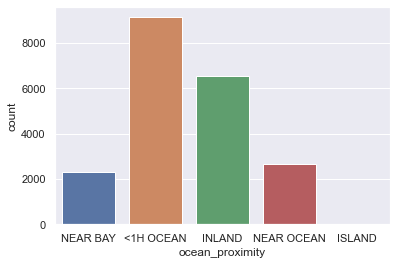

In [24]:
sns.countplot(df_housing["ocean_proximity"]);

To decide if we should include `ISLAND` is one of the remaining categories, we can plot the histogram against the label column, here `medien_house_value` with different values of `ocean_proximity.`

Text(0.5, 1.0, 'NOT ISLAND')

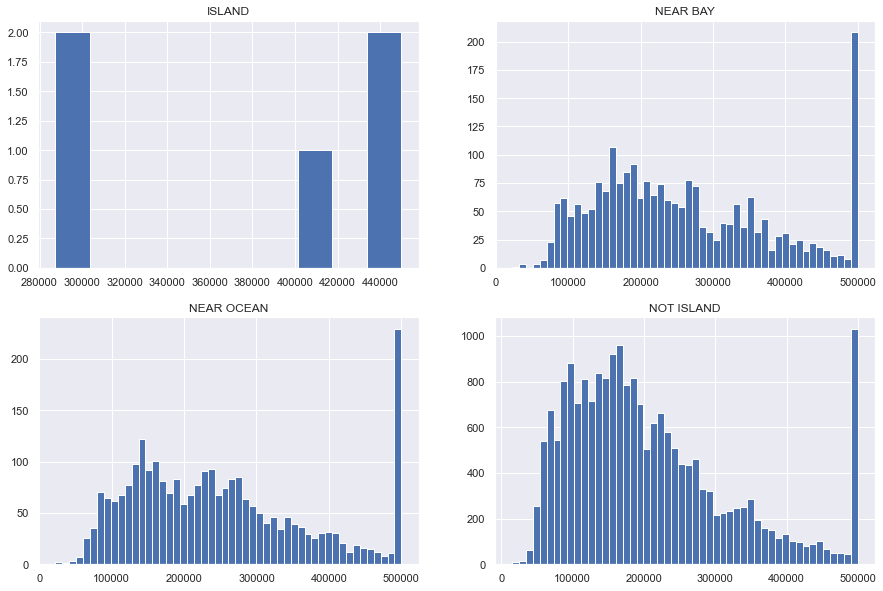

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10));
df_housing[df_housing["ocean_proximity"] == "ISLAND"]["median_house_value"].hist(ax=axes[0][0])
axes[0][0].set_title("ISLAND")
df_housing[df_housing["ocean_proximity"] == "NEAR BAY"]["median_house_value"].hist(bins=50, ax=axes[0][1]);
axes[0][1].set_title("NEAR BAY")
df_housing[df_housing["ocean_proximity"] == "NEAR OCEAN"]["median_house_value"].hist(bins=50, ax=axes[1][0]);
axes[1][0].set_title("NEAR OCEAN")
df_housing[df_housing["ocean_proximity"] != "ISLAND"]["median_house_value"].hist(bins=50, ax=axes[1][1]);
axes[1][1].set_title("NOT ISLAND")

We can see that homes in `ISLAND` have a reasonably high value, from about $300k and up, while other areas have prices concentrated in the lower segments. It seems that `ISLAND` is a good sign for valuing homes and should be treated as a separate category. However, you can also try to bundle `ISLAND` with a specific variety and try.

In Machine Learning, there is no absolute best method. Determining which idea is better than most is based on many experiments. Given the constraints of time and resources, you should start with ideas that you feel will yield better results than before.

If you want to include `ISLAND` with another value, such as `NEAR BAY,` you can do the following:

<AxesSubplot:>

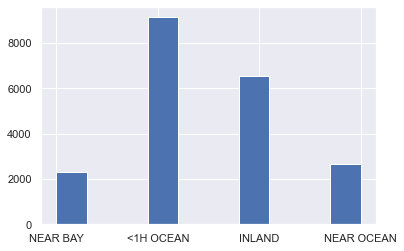

In [26]:
df_housing[df_housing["ocean_proximity"] == "ISLAND"] = "NEAR BAY"
df_housing["ocean_proximity"].hist()